In [7]:
import torch

half_height = 5
half_width = 6
mask_left = torch.tile(torch.tensor([[0,1],[1,0]],dtype=torch.int64), (half_height, half_width))
mask_right = torch.tile(torch.tensor([[1,0],[0,1]],dtype=torch.int64), (half_height, half_width))

# Règle 50 (à lire à l'envers)
rule = torch.tensor([[0, 1, 0, 0, 1, 1, 0, 0]], dtype=torch.uint8)

state = torch.zeros((2*half_height, 2*half_width), dtype=torch.uint8)
state[half_height,half_width]=1

for step in range(2):
    state_above = torch.roll(state, 1, 0)
    state_below = torch.roll(state, -1, 0)
    state_left = torch.roll(state, 1, 1)*mask_left
    state_right = torch.roll(state, -1, 1)*mask_right
    transition = state_above + state_below + state_left + state_right + 4*state
    state = rule.take(transition)
    print(state)

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=torch.uint8)
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=torch.uint8)


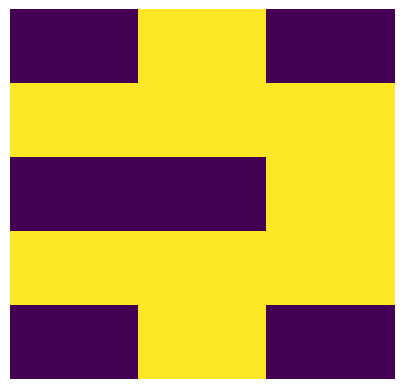

In [ ]:
import torch, math, matplotlib.pyplot as plt

rule, time = 50, 352 # parameters

height, width = 1+2*time, 1+2*math.ceil(time/2); order = height*width
state = torch.zeros(order, dtype=torch.int64); state[math.floor(order/2)] = 1
rule = torch.tensor(([int(d) for d in 8*'0'+str(bin(rule))[2:]])[:-9:-1])

for step in range(time):
    config = 4*state + torch.roll(state, width) + torch.roll(state, -width)
    config[0::2] += torch.roll(state, 1)[0::2]
    config[1::2] += torch.roll(state, -1)[1::2]
    state = rule.take(config)

state = torch.reshape(state,(height,width))
plt.axis('off'); plt.imshow(state, aspect=1/math.sqrt(3), interpolation='antialiased')

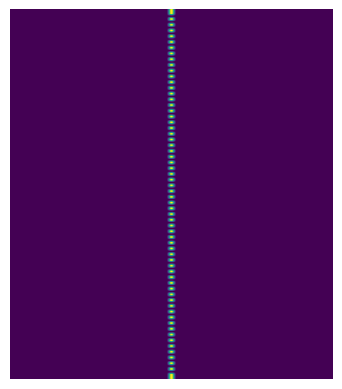

In [83]:
import torch, math, matplotlib.pyplot as plot

t=64

rule = torch.tensor([0, 1, 0, 0, 1, 1, 0, 0])

state = torch.zeros(1+2*t, 1+2*math.ceil(t/2), dtype=torch.int64)
state[t,math.ceil(t/2)] = 1

for step in range(t):
    config = 4*state + torch.roll(state, 1, 0) + torch.roll(state, -1, 0)
    # config[0::2] += torch.roll(state, 1, 0)[0::2]
    # config[1::2] += torch.roll(state, -1, 0)[1::2]
    state = rule.take(config)

plot.axis('off')
plot.imshow(state, aspect=1/math.sqrt(3), interpolation='antialiased')

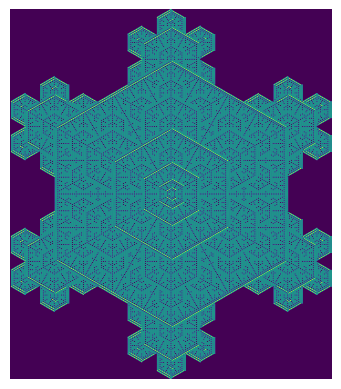

In [5]:
import torch, math, matplotlib.pyplot as plt

rule, time = 50, 351 # parameters

height, width = 1+2*time, 1+2*math.ceil(time/2); order = height*width
state = torch.zeros(order, dtype=torch.int64); state[math.floor(order/2)] = 1
rule = torch.tensor(([int(d) for d in 8*'0'+str(bin(rule))[2:]])[:-9:-1])

for step in range(time):
    config = 4*state + torch.roll(state, width) + torch.roll(state, -width)
    config[0::2] += torch.roll(state, 1)[0::2]
    config[1::2] += torch.roll(state, -1)[1::2]
    state = rule.take(config)

state = torch.reshape(state,(height,width))
plt.axis('off'); plt.imshow(state, aspect=1/math.sqrt(3), interpolation='antialiased')